**Run the following two cells before you begin.**

In [3]:
%autosave 10

Autosaving every 10 seconds


In [4]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [5]:
# Import the data set
df=pd.read_csv("C:/Users/JAYANK/Desktop/Technocolabs/Mini Project 2/cleaned_data.csv")

In [6]:
# Define the sigmoid function
def sigmoid(x):
    y=1/(1+np.exp(-x))
    return y


In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [15]:
# Create a train/test split
from sklearn.model_selection import train_test_split
X=df[['PAY_1','LIMIT_BAL']].values
Y=df['default payment next month'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=24,test_size=0.2)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [20]:
# Fit the logistic regression model on training data
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Make predictions using `.predict()`
pred=model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
# Find class probabilities using `.predict_proba()`
pred_prob=model.predict_proba(X_test)
pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [27]:
# Add column of 1s to features
df['1s']=0
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university,1s
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,1,0
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,1,0
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,1,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,1,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,high school,0,1,0,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,high school,0,1,0,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,university,0,0,0,1,0
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,high school,0,1,0,0,0


In [32]:
# Get coefficients and intercepts from trained model
coef=model.coef_
intercept=model.intercept_

In [80]:
# Manually calculate predicted probabilities
theta1=coef[0][0]
theta2=coef[0][1]
a=X_test[:,0]
b=X_test[:,1]
x=theta1*a + theta2*b + intercept
manual_pred_prob=sigmoid(x)
sk_learn_pred_prob=pred_prob[:,1]
print(manual_pred_prob)
if(all(manual_pred_prob)==all(sk_learn_pred_prob)):
    print("YES BOTH PROBABILITIES ARE EQUAL TRUE")

[0.25173076 0.415703   0.20395547 ... 0.415703   0.17278502 0.33606565]
YES BOTH PROBABILITIES ARE EQUAL TRUE


______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [101]:
# Manually calculate predicted classes
manual_pred_prob
mask=list(manual_pred_prob>0.5)
manual_prediction=[]
for i in mask:
    if(i==False):
        manual_prediction.append(0)
    else:
        manual_prediction.append(1)
manual_prediction=np.array(manual_prediction)
manual_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
# Compare to scikit-learn's predicted classes
manual_prediction==pred

array([ True,  True,  True, ...,  True,  True,  True])

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [111]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics
roc_auc_sklearn=metrics.roc_auc_score(Y_test,sk_learn_pred_prob)
roc_auc_sklearn

0.627207450280691

In [114]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_manual=metrics.roc_auc_score(Y_test,manual_pred_prob)
roc_auc_manual

0.627207450280691

In [117]:
fpr_sk,tpr_sk,threshold_sk=metrics.roc_curve(Y_test,sk_learn_pred_prob)
fpr_manual,tpr_manual,threshold_manual=metrics.roc_curve(Y_test,manual_pred_prob)

Text(0.5, 1.0, 'ROC CURVE BY SKLEARN AND MANUAL')

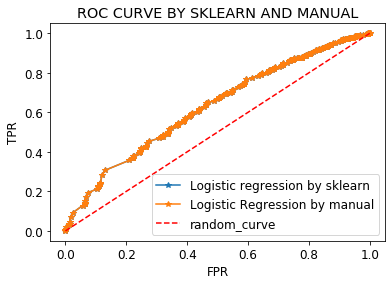

In [119]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size']=12
plt.plot(fpr_sk,tpr_sk,'*-')
plt.plot(fpr_manual,tpr_manual,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression by sklearn','Logistic Regression by manual','random_curve'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE BY SKLEARN AND MANUAL')

In [120]:
# THEY BOTH ARE SAME BY MANUAL AND SK-LEARN